In [67]:
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.models import Sequential
import matplotlib.pyplot as plt
from keras.src.optimizers import Adam

# Build Model

In [68]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(12, 28, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

In [69]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 12, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 12, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 6, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 6, 14, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 6, 14, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 3, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 3, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 3, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 3, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 1, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 1, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 31)             │        15,903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,143 (992.75 KB)

 Trainable params: 254,143 (992.75 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/home/minhpn/Desktop/Green_Parking/dataset_vietnam_licenses_plate_train'
test_dir = '/home/minhpn/Desktop/Green_Parking/dataset_vietnam_license_plate_val'

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

Found 3100 images belonging to 31 classes.
Found 620 images belonging to 31 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0424 - loss: 3.4301 - val_accuracy: 0.1742 - val_loss: 3.1665
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1968 - loss: 2.7500 - val_accuracy: 0.8129 - val_loss: 0.7283
Epoch 4/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5948 - loss: 1.2107 - val_accuracy: 0.9339 - val_loss: 0.3023
Epoch 6/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7561 - loss: 0.7066 - val_accuracy: 0.9452 - val_loss: 0.2027
Epoch 8/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
 37/388 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7939 - loss: 0.5805

2025-07-11 09:33:53.177034: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8118 - loss: 0.5615 - val_accuracy: 0.9548 - val_loss: 0.1570
Epoch 10/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8532 - loss: 0.4456 - val_accuracy: 0.9645 - val_loss: 0.1314
Epoch 12/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8786 - loss: 0.3661 - val_accuracy: 0.9758 - val_loss: 0.1020
Epoch 14/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9054 - loss: 0.3155 - val_accuracy: 0.9742 - val_loss: 0.0992
Epoch 16/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9116 - loss: 0.2764 - val_accuracy: 0

78/78 - 0s - 3ms/step - accuracy: 0.9629 - loss: 0.1558


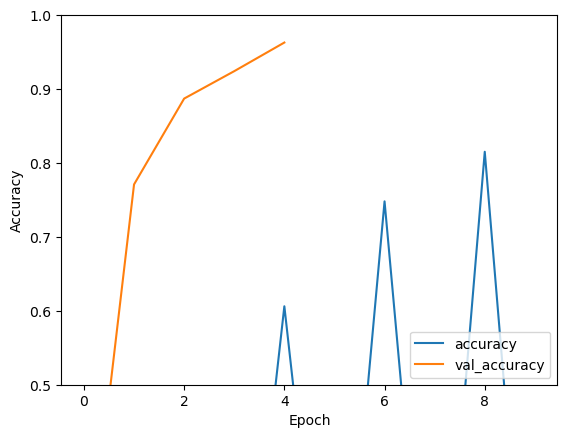

In [65]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [66]:
print(test_acc)

0.9629032015800476
